# Plotnine

### Introduction to Plotnine

**Plotnine** is a data visualization package in Python that is built on the principles of **The Grammar of Graphics**, which is the foundation for ggplot2 in R. It provides a powerful and flexible way to create complex, layered visualizations with a simple and consistent syntax. Plotnine allows users to create intricate plots by mapping data to visual elements, making it an excellent tool for data exploration and storytelling.

One of the key advantages of Plotnine is its layered approach to building plots. You can start with basic visual elements (like points or lines) and progressively add more layers to customize and enhance the visualization. This modular approach gives users great control over the final appearance of the plot while keeping the code organized and readable.

Plotnine supports various chart types such as scatter plots, line charts, bar charts, and more, while also providing extensive customization options for titles, labels, themes, and color scales. It’s especially useful for those who prefer or are familiar with ggplot2 in R and want similar functionality in Python.

In [1]:
import pandas as pd

In [2]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_bar
from plotnine.data import mtcars
import plotnine as p9

Here is a classic example from ggplot2

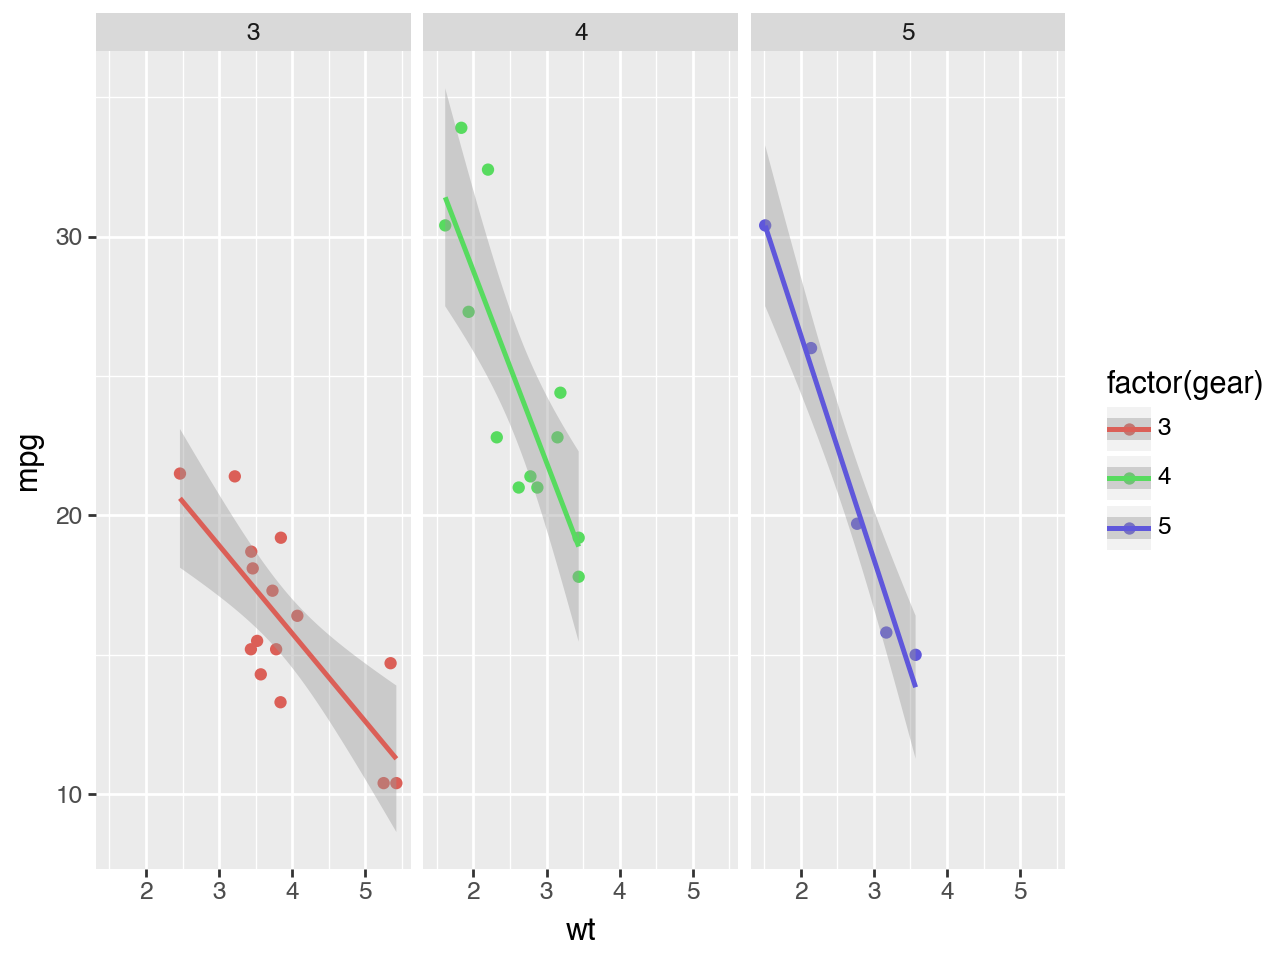

In [3]:
## Example of a scatter plot with a linear regression line
(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~gear'))

Bar chart example

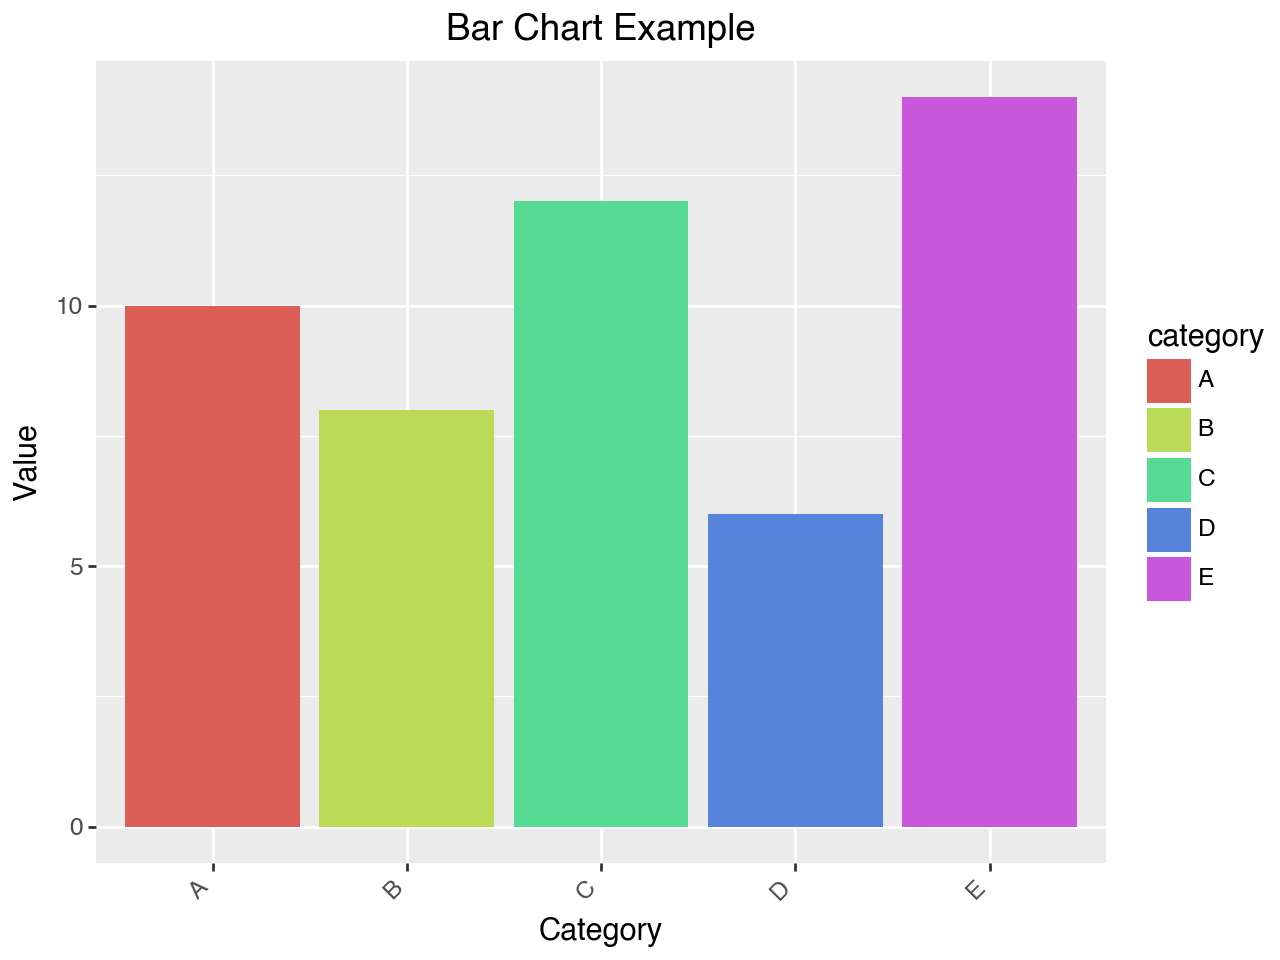

In [4]:
# create example data
data = pd.DataFrame({
    'category': ['A', 'B', 'C', 'D', 'E'],
    'value': [10, 8, 12, 6, 14]
})

# create plot object
p = ggplot(data, aes(x='category', y='value', fill='category'))

# add bar layer
p += geom_bar(stat='identity')

# customize plot
p += p9.labs(title='Bar Chart Example', x='Category', y='Value')
p += p9.theme(axis_text_x=p9.element_text(rotation=45, hjust=1))

# display plot
p.show()


Another classic ggplot2 example is the recreation of Minard's map of Napoleon's 1812 Russian Campaign.

In [5]:
cities = pd.read_csv("minard_data/minard_cities.txt", sep=" ", names=["lon", "lat", "city"])
temperatures = pd.read_csv("minard_data/minard_temperature.txt", sep=" ", names=["lon", "temp", "days", "day"])
troops = pd.read_csv("minard_data/minard_troops.txt", sep=" ", names=["lon",  "lat", "survivors" , "direction", "division"])

In [6]:
temperatures["label"] = temperatures.fillna("").apply(
    axis=1, func=lambda row: "{}° {}".format(row.iloc[1], row.iloc[3].replace("-", " "))
)
troops = troops.sort_values(by=["division", "survivors"], ascending=False)

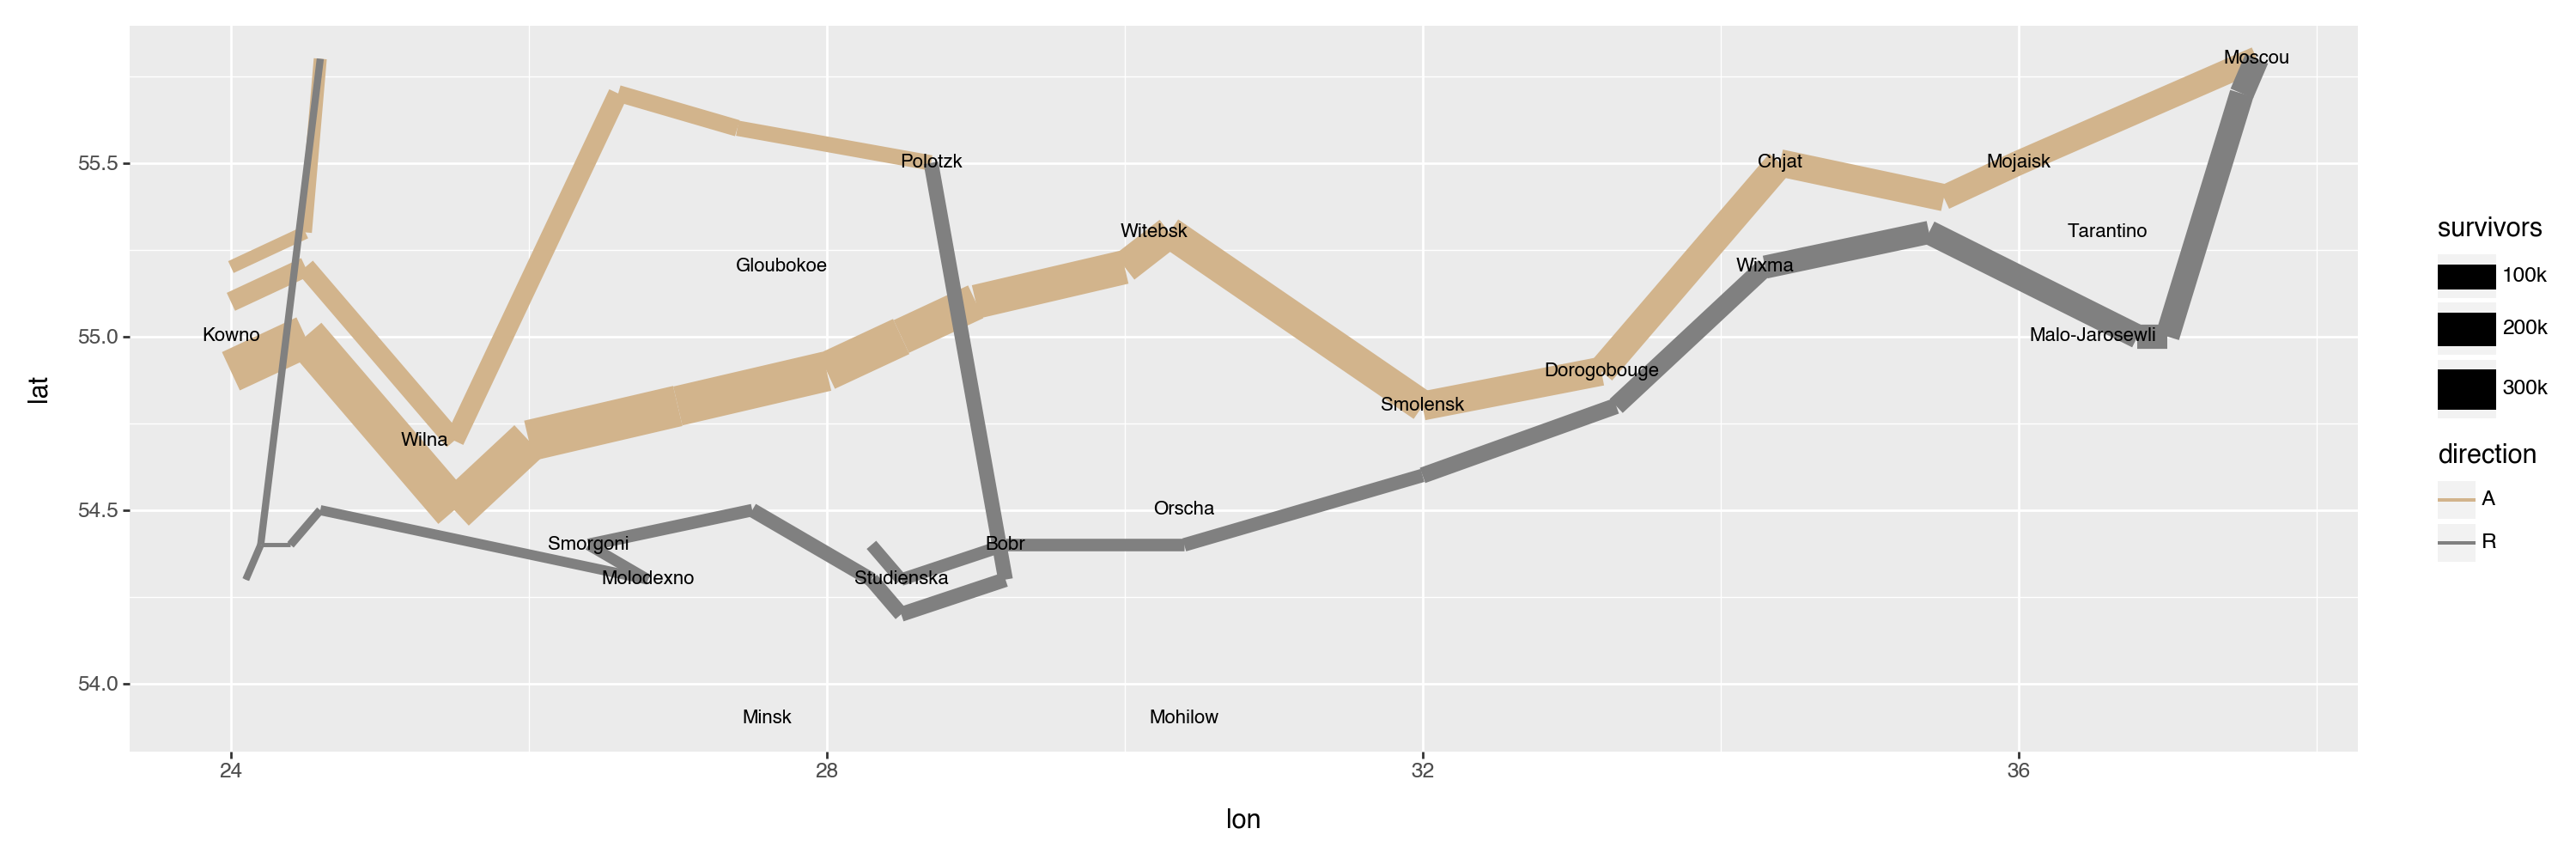

In [8]:
p9.options.figure_size=(15,5)

p = (ggplot(troops, aes('lon','lat')) +
               p9.geom_path(aes(size='survivors', color='direction', group = 'division')))

p = (p + p9.geom_text(aes(label='city'), size=8, data=cities))
               

p = p + p9.scale_size(range=[1, 10], breaks=[1e5, 2e5, 3e5],
                                   labels=['100k', '200k', '300k']) + \
            p9.scale_color_manual(values=['tan', 'grey']) + \
            p9.labs(x=None, y=None)
p.show()

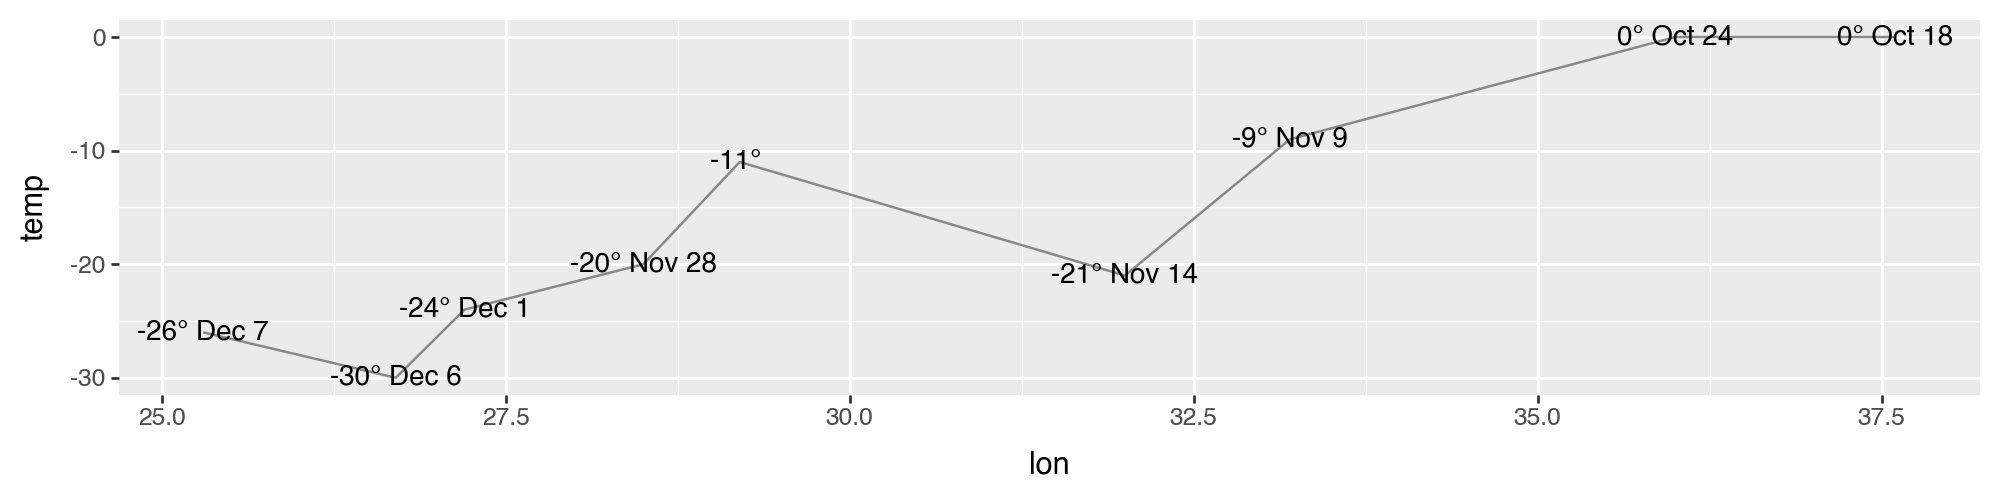

In [9]:
temperatures_chart = (ggplot(temperatures, aes(x='lon', y='temp')) +
                     p9.geom_line(color='#888888') +
                     p9.geom_text(aes(label='label'), 
                               #fontfamily='Cardo', 
                               size=10, 
                               #nudge_x=5, 
                               #nudge_y=20
                              ) +
                     p9.theme_grey() +
                     p9.labs(x='lon') +
                     p9.ylim(temperatures['temp'].min(), temperatures['temp'].max()) +
                     p9.coord_cartesian())
                     
# Adjust chart height
temperatures_chart = temperatures_chart + p9.theme(
    figure_size=(10, 2.5)
)
temperatures_chart.show()